In [45]:
from typing import List, Union

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error as mae

In [67]:
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 1,
                       random_state=True)

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1), y)

In [69]:
class LinearRegression:
    
    def __init__(self) -> None:
        self.learning_rate = 0.1
        self.m = 0
        self.b = 0
        
        
    def fit(self, X:np.ndarray, y:np.ndarray, n_epochs: int = 100) -> None:
        self.X = X
        self.y = y
        
        loss = np.array([])
        
        for epoch in range(n_epochs):
            for i in range(len(X)):
                loss = np.append(loss, (np.square(self.predict(X[i]) - y[i])))

                der_m, der_b = self.calculate_descent(X[i], y[i])

                self.m = self.m - self.learning_rate * der_m
                self.b = self.b - self.learning_rate * der_b

        
    def calculate_descent(self, X, y):
        der_m = 2 * ((self.m * X + self.b) - y) * X
        der_b = 2 * ((self.m * X + self.b) - y)
        
        return der_m, der_b
    
        
    def predict(self, X:float):
        return self.m * X + self.b

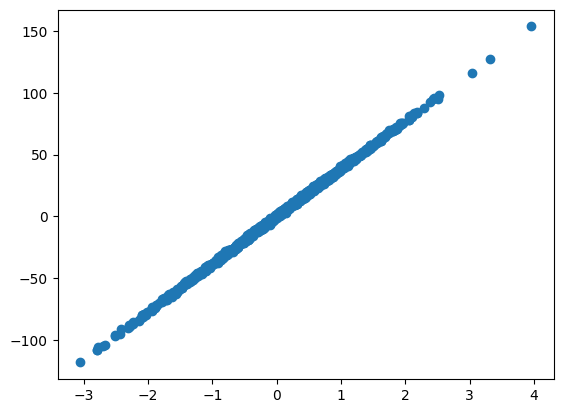

In [70]:
plt.scatter(X, y)
plt.show()

In [71]:
lr = LinearRegression()
lr.fit(X_train, y_train, 10)

8.775020470484124
1.2884015270364553
1.2884015270364553
1.2884015270364553
1.2884015270364553
1.2884015270364553
1.2884015270364553
1.2884015270364553
1.2884015270364553
1.2884015270364553


In [72]:
preds = lr.predict(X_test)

In [73]:
mae(preds, y_test)

1.0104853790365802

In [74]:
max(y) - min(y)

272.2790660854249